In [2]:
import pandas as pd
import requests
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
url = 'http://fits.geonet.org.nz/site?typeID=Cl-w'
r = requests.get(url)
jdata = r.json()
features = jdata['features']

In [4]:
dfsite = pd.DataFrame()
for i, val in enumerate(features):
  geometry = val['geometry']
  properties = val['properties']
  siteID = properties['siteID']
  networkID = properties['networkID']
  dfsite = dfsite.append({'networkID': networkID, 'siteID': siteID}, ignore_index=True)

In [5]:
names = ['dt', 'obs', 'err']
dfts = pd.DataFrame()
for site, network in zip(dfsite['siteID'], dfsite['networkID']):
  site = site.encode('ascii','ignore')
  network = network.encode('ascii','ignore')
  url= 'https://fits.geonet.org.nz/observation?typeID=Cl-w'+'&siteID='+site+'&networkID='+network
  df = pd.read_csv(url, names=names, skiprows=1, parse_dates={"Datetime" : ['dt']})
  df['siteID'] = site
  df['networkID'] = network
  dfts = dfts.append(df, ignore_index=True)

In [6]:
dfall = pd.merge(dfsite, dfts, on=['siteID','networkID'])
dfsdesc = dfall['obs'].groupby(dfall['siteID']).describe().unstack()

In [7]:
dfsdesc.head()

,count,mean,std,min,25%,50%,75%,max
siteID,,,,,,,,
OT001,8.0,877.375000,29.335193,819.0,870.0,879.0,888.5,922.0
OT002,8.0,632.125000,23.763342,593.0,620.0,634.5,640.0,673.0
OT010,13.0,135.230769,7.338867,125.0,130.0,133.0,141.0,149.0
OT011,13.0,199.923077,16.600510,183.0,192.0,198.0,199.0,252.0
OT012,1.0,205.000000,NaN,205.0,205.0,205.0,205.0,205.0


In [8]:
dft = dfsdesc.transpose()

In [9]:
dft.head()

siteID,OT001,OT002,OT010,OT011,OT012,OT013,OT014,OT015,OT016,OT017,...,WI221-2,WI222,WI223,WI224,WI225-1,WI225-2,WI226,WI226-1,WI226-2,WI227
count,8.000000,8.000000,13.000000,13.000000,1.0,11.000000,8.000000,8.000000,13.000000,1.0,...,49.000000,37.000000,23.000000,11.000000,29.000000,3.000000,35.000000,5.000000,30.000000,24.000000
mean,877.375000,632.125000,135.230769,199.923077,205.0,358.454545,621.375000,596.625000,419.307692,399.0,...,1663.265306,23723.135135,3532.434783,9854.090909,108900.724138,109954.666667,20345.600000,7035.200000,22564.000000,29699.375000
std,29.335193,23.763342,7.338867,16.600510,NaN,6.170310,51.213663,173.497581,22.779320,NaN,...,1407.455339,6532.436176,1009.270521,17428.300172,38487.754594,43937.925080,12747.224919,1269.386348,12435.767661,14788.005189
min,819.000000,593.000000,125.000000,183.000000,205.0,351.000000,550.000000,273.000000,382.000000,399.0,...,37.000000,9334.000000,2247.000000,124.000000,43751.000000,59221.000000,2125.000000,5440.000000,2125.000000,1290.000000
25%,870.000000,620.000000,130.000000,192.000000,205.0,354.500000,585.500000,553.750000,405.000000,399.0,...,499.000000,18716.000000,2513.000000,186.500000,78846.000000,97103.500000,8658.500000,6557.000000,12403.250000,19788.250000


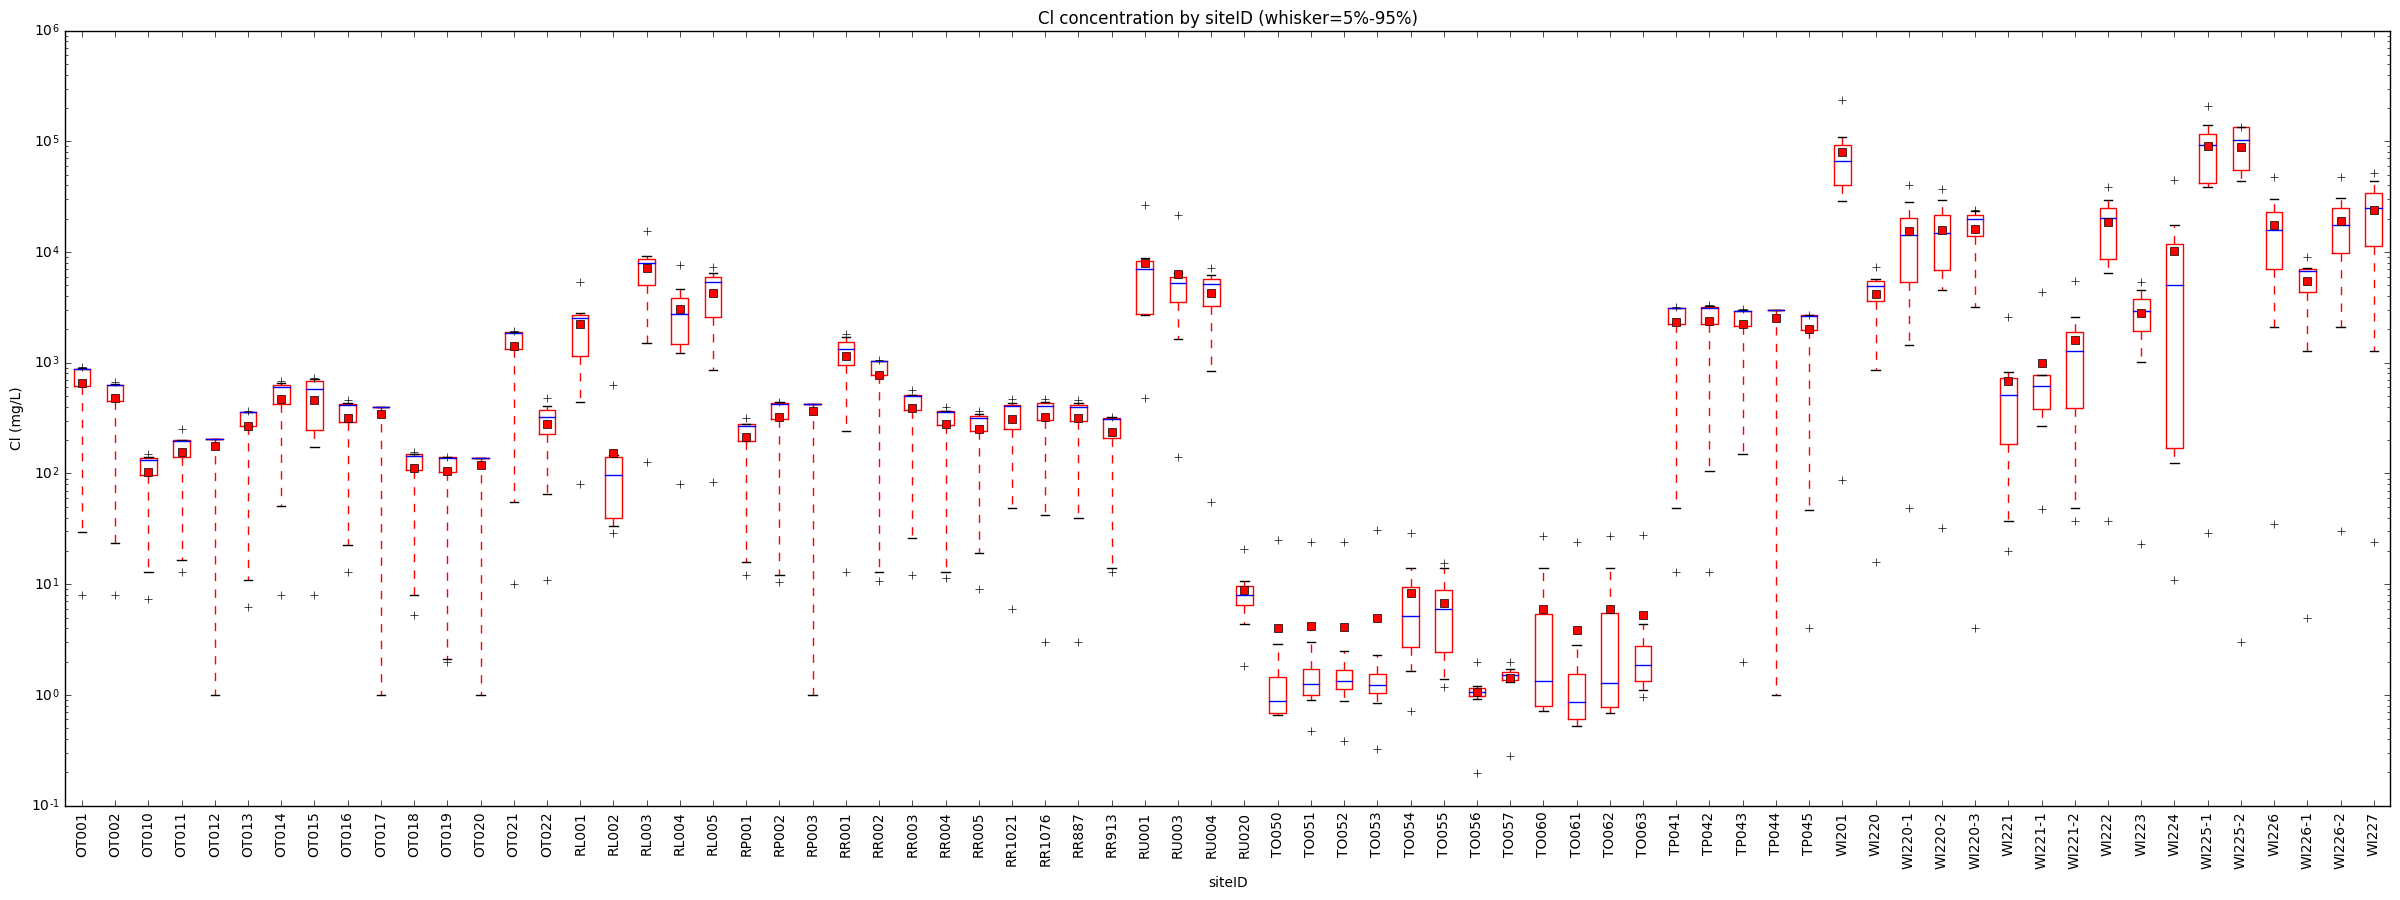

In [34]:
color = dict(boxes='Red', whiskers='Red', medians='Blue', caps='Black')
bp = dft.plot.box(figsize=(30,10), logy=True, rot=90, title='Cl concentration by siteID (whisker=5%-95%)', showmeans=True, whis=[5,95], color=color)
bp.set_ylabel("Cl (mg/L)")
bp.set_xlabel("siteID")

In [35]:
fig = bp.get_figure()
fig.savefig('Clbox.png', dpi=200)